# Obtención de imágenes de prueba

Para definir los tipos de hojas que clasificaremos, necesitaremos recolectar información sobre su forma, usamos algunas imágenes de ejemplo para encontrar puntos iniciales que nos servirán de referencia para comparar los momentos de una imagen de prueba.

In [1]:
from image import Image
import matplotlib.pyplot as plt

Cargamos algunas imágenes básicas de prueba para comparar cómo varían sus momentos al variar sus tamaños y posición.

In [2]:
lanceolada = "./testimages/leafs/lanceolada.jpg"
flabelada = "./testimages/leafs/flabelada.jpg"
acumitada = "./testimages/leafs/acumitada.jpg"
orbicular = "./testimages/leafs/orbicular.jpg"
romboide = "./testimages/leafs/romboide.jpg"
ovada = "./testimages/leafs/ovada.jpg"
astada = "./testimages/leafs/astada.jpg"
palmeada = "./testimages/leafs/palmeada.jpg"
sagitada = "./testimages/leafs/sagitada.jpg"

leafs =[flabelada,acumitada,orbicular,romboide,ovada,astada,palmeada,sagitada]


In [3]:
ll = Image()
ll.load_file(lanceolada)

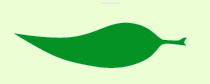

In [4]:
ll.show()

In [5]:
print(ll.hu_moments())

(0.3999693426853134, 0.08241080043135868)


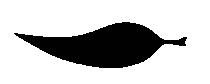

In [6]:
lle = ll
bound = lambda x: 255 if x > 200 else 1
lle.map_over(lambda r, g, b: (bound(r), bound(r), bound(r)))
lle.show()

In [7]:
print(ll.hu_moments())

(0.37909044343709997, 0.07376957553180492)


Realizaremos este proceso para cada una de las imágenes de prueba.

In [8]:
def binarize(url):
    ll = Image()
    ll.load_file(url)
    ll.map_over(lambda r, g, b: (bound(r), bound(r), bound(r)))
    return ll
    
binary_leafs = map(binarize, leafs)
hu_moments = list(map(lambda x: x.hu_moments(), binary_leafs))

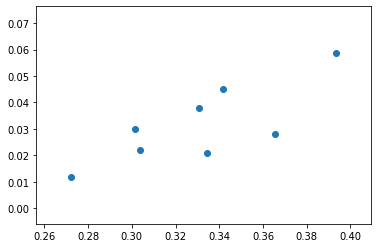

In [9]:
plt.scatter(*zip(*hu_moments))
plt.show()

La gráfica nos muestra la disposición de los momentos invariantes para cada imagen, ahora compararemos con una imagen de prueba.

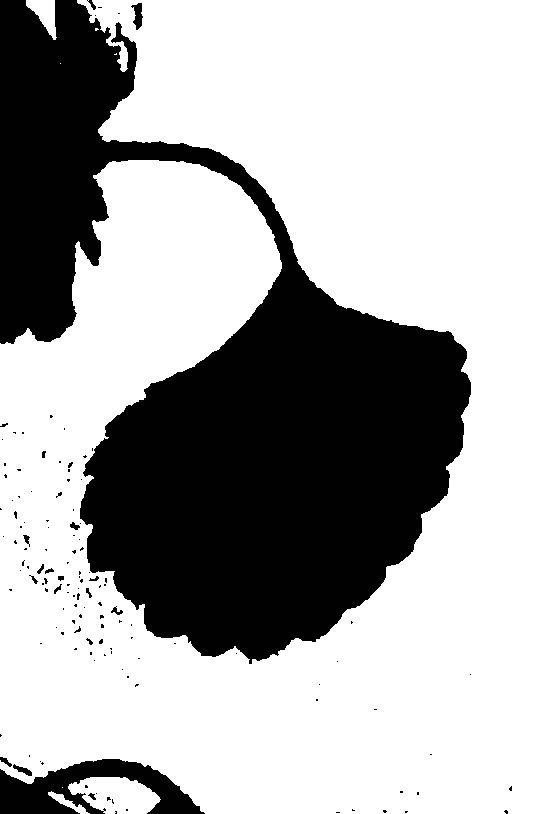

In [10]:
test = "./testimages/leafs/test.jpg"
tl = binarize(test)
tl.show()

In [11]:
tm = tl.hu_moments()

In [12]:
def get_moments(url):
    im = Image()
    im.load_file(url)
    return (url, im.hu_moments())
  
get_position = lambda x: x[1]

hu_name_moments = list(map(get_moments, leafs))
hu_moments = list(map(get_position, hu_name_moments))

Agregamos la imagen de prueba a la gráfica.

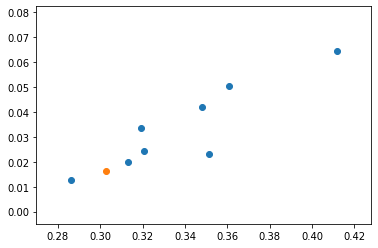

In [13]:
plt.scatter(*zip(*hu_moments))
plt.scatter(*tm)
plt.show()

Graficamos mostrando los nombres de los archivos

./testimages/leafs/acumitada.jpg


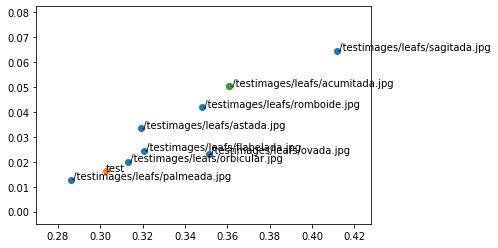

In [14]:
plt.scatter(*zip(*hu_moments))
plt.scatter(*tm)

for label, moments in hu_name_moments:
    plt.annotate(label, moments)
    
url, moments = get_moments(leafs[1])
print(url)
plt.scatter(*moments)
plt.annotate("test", tm)
plt.show()

A simple vista, la imagen se encuentra cerca de la forma orbicular, lo cual no es exacto, sin embargo la forma no se aleja mucho del resultado,  con más imágenes de prueba y un mejor preprocesamiento de la imagen se podrían obtener mejores resultados.